In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("/Users/baejuyeong/2022-Undergraduate-Convergence-Program/DB/2011~2021_db/github_2011_2021(0_1).csv", low_memory=False, encoding='cp949')

In [19]:
df.head()

,Num,User_ID,User_Name,Repository_Name,created_at,updated_at,pushed_at,CSS,JavaScript,CoffeeScript,...,Charity,RUNOFF,Click,Pep8,GAMS,Grace,Curry,Janet,Pan,ATS
0,5092,50314,atombender,cadvisor,2016-07-21T04:18:31Z,2016-07-21T04:18:32Z,2016-07-22T00:04:24Z,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5091,100451,mjrusso,joy-of-clojure-examples,2011-11-10T03:39:00Z,2018-11-13T21:06:24Z,2012-05-06T03:51:45Z,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5090,100451,mjrusso,dotfiles,2011-11-05T16:20:04Z,2022-04-12T02:52:05Z,2022-04-20T18:26:08Z,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5089,50314,atombender,bundler-audit,2013-03-01T23:56:25Z,2013-05-24T20:04:18Z,2013-03-02T00:06:03Z,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5088,100451,mjrusso,better-together,2011-09-22T12:47:56Z,2014-04-27T10:10:53Z,2011-10-18T21:18:12Z,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df['date'] = df['created_at']
df['year'] = df['created_at']
df['date'] = df.created_at.str[0:10] # 날짜 부분 추출
df['year'] = df.created_at.str[0:7]

df['date'] = pd.to_datetime(df.date)
dt = df.sort_values(by='date')

dt.year


142522    2011-01
38161     2011-01
187176    2011-01
117739    2011-01
67776     2011-01
           ...   
1864      2021-12
137004    2021-12
238128    2021-12
187687    2021-12
194608    2021-12
Name: year, Length: 250073, dtype: object

In [33]:
dt = dt.drop(['created_at'], axis=1)
dt = dt.drop(['updated_at'], axis=1)
dt = dt.drop(['pushed_at'], axis=1)

dt = dt.drop(['Makefile'], axis=1)

dt.head

<bound method NDFrame.head of            Num  User_ID    User_Name Repository_Name  CSS  JavaScript  \
142522  142555     4573   joshfrench         liquify    0           0   
38161    38194   103576        molte              io    0           0   
187176  187209     6295       jsuchy              go    0           0   
117739  117772   110766      typeish      pigeonfarm    0           1   
67776    67809   106559    heinemann   Konsolenradio    0           0   
...        ...      ...          ...             ...  ...         ...   
1864      1886   100118         leod         crevice    0           0   
137004  137037     4395       matsuu         co2mini    0           0   
238128  238161   119445      jftsang           geoip    0           0   
187687  187720   116815  Gendron5000            sm64    0           1   
194608  194641     6550         phss  advent-of-code    0           0   

        CoffeeScript  Shell  Ruby  Perl  ...  Click  Pep8  GAMS  Grace  Curry  \
142522      

In [35]:
value = dt.sum()
value = value.drop("year")
value = value.drop("User_ID")
value = value.drop("User_Name")
value = value.drop("Num")
sort_val = value.sort_values(ascending = False)

List_Lang = sort_val.index
List_Lang = List_Lang.to_list()
List_Lang

/var/folders/r5/2g6jjfy15fjf_9rt8x2cfgs00000gn/T/ipykernel_22995/3910773269.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  value = dt.sum()


['JavaScript',
 'Shell',
 'HTML',
 'Ruby',
 'CSS',
 'Python',
 'C',
 'Java',
 'C++',
 'PHP',
 'Go',
 'Objective-C',
 'Dockerfile',
 'Perl',
 'TypeScript',
 'CoffeeScript',
 'C#',
 'Batchfile',
 'Vim Script',
 'Swift',
 'Clojure',
 'CMake',
 'Rust',
 'PowerShell',
 'Scala',
 'Emacs Lisp',
 'Elixir',
 'Assembly',
 'Lua',
 'Groovy',
 'Jupyter Notebook',
 'SCSS',
 'Roff',
 'Haskell',
 'R',
 'Erlang',
 'M4',
 'Kotlin',
 'Vue',
 'Smarty',
 'TeX',
 'XSLT',
 'ApacheConf',
 'HCL',
 'Gherkin',
 'ASP',
 'Awk',
 'Arduino',
 'Yacc',
 'Perl 6',
 'Groff',
 'Objective-C++',
 'Puppet',
 'MATLAB',
 'Tcl',
 'Nix',
 'Dart',
 'PLpgSQL',
 'GLSL',
 'Lex',
 'Prolog',
 'Scheme',
 'Elm',
 'Common Lisp',
 'Pascal',
 'ActionScript',
 'Handlebars',
 'Protocol Buffer',
 'Nginx',
 'AppleScript',
 'D',
 'Visual Basic',
 'F#',
 'OCaml',
 'QMake',
 'Starlark',
 'NSIS',
 'TSQL',
 'PLSQL',
 'Smalltalk',
 'Processing',
 'PostScript',
 'Crystal',
 'Hack',
 'DIGITAL Command Language',
 'Less',
 'Cuda',
 'Logos',
 'Julia',
 

In [36]:
def list_Chunk(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

list_Chunked = list_Chunk(List_Lang, 10)

In [37]:
list_Chunked
List_top10 = list_Chunked[0]
List_top10

dt[List_top10]

,JavaScript,Shell,HTML,Ruby,CSS,Python,C,Java,C++,PHP
142522,0,0,0,1,0,0,0,0,0,0
38161,0,0,0,0,0,0,1,0,0,0
187176,0,0,0,1,0,0,0,0,0,0
117739,1,0,0,0,0,1,0,0,0,0
67776,0,1,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1864,0,0,0,0,0,0,0,0,0,0
137004,0,0,0,0,0,0,0,0,0,0
238128,0,0,1,0,0,1,0,0,0,0
187687,1,1,0,0,0,1,1,0,1,0


In [42]:
from re import T


grouped = dt[List_top10].groupby(dt['year']).sum()

def ratio():  #비율 계산
    for i in range(0, 132):
        Total = 0
        for j in range(0, 10):
            Total += grouped.iloc[i][j]
        
        for j in range(0, 10):
            grouped.iloc[i][j] = int(round(grouped.iloc[i][j]/Total * 100,2))
#ratio()

grouped

,JavaScript,Shell,HTML,Ruby,CSS,Python,C,Java,C++,PHP
year,,,,,,,,,,
2011-01,403,182,35,524,47,177,142,113,63,108
2011-02,430,212,43,538,58,237,142,105,59,97
2011-03,455,246,24,540,45,267,154,132,61,109
2011-04,466,206,33,541,49,219,161,93,71,101
2011-05,469,247,43,578,54,225,152,131,70,103
...,...,...,...,...,...,...,...,...,...,...
2021-08,483,493,459,185,310,320,135,90,92,55
2021-09,568,549,479,204,350,319,147,112,126,63
2021-10,601,581,466,201,337,358,149,103,121,84


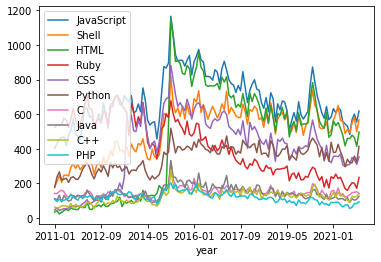

In [43]:
ax = grouped.plot(kind='line')